# 0. 시작하기 전에

### 구글 드라이브 연동

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 기본 경로 설정

In [28]:
import os
os.chdir('/content/drive/MyDrive/프로젝트/이어드림 실습/이어드림 1차 모의프로젝트/data/')

In [29]:
!pwd

/content/drive/MyDrive/프로젝트/이어드림 실습/이어드림 1차 모의프로젝트/data


### 패키지 임포트

In [30]:
import numpy as np      # 넘파이
import pandas as pd     # 판다스
import matplotlib.pyplot as plt     # 맷플롯립
import seaborn as sns       # 시본
import matplotlib.gridspec as gridspec  # 한 번에 여러 그래프를 출력시켜주는 라이브러리
%matplotlib inline

### 전체 컬럼, 로우 다 보이게 설정

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. 탐색적 데이터 분석 (EDA : Exploratory Data Analysis)



In [32]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv("sample_submission.csv")

### 각 데이터 확인

In [33]:
train.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [34]:
train.shape

(100000, 76)

In [35]:
test.head()

,ID,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high
0,0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704
1,1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679
2,2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679
3,3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669
4,4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714


In [36]:
test.shape

(35816, 76)

In [37]:
submission.head()

,ID,answer
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [38]:
submission.shape

(35816, 2)

### train 변수 이름 설명




*   int_rate : 대출자에 부여된 이자율
*   annual_inc : 연 소득
*   dti : 소득 대비 부채 비율
*   delinq_2yrs : 지난 2년 간 체납 발생 횟수
*   inq_last_6mths : 지난 6개월 간 신용 조회 수
*   pub_rec : 파산 횟수
*   revol_bal : 리볼빙 잔액
*   total_acc : 지금까지 소유했던 신용카드 개수
*   collections_12_mths_ex_med : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수
*  acc_now_delinq : 대출자가 체납 상태에 있지 않은 계좌의 수
*  tot_coll_amt : 대출자에 대한 현재까지의 총 추심액
*  tot_cur_bal : 전 계좌의 현재 통합 잔고
*  chargeoff_within_12_mths : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수
*  delinq_amnt : 체납 금액
* tax_liens : 세금 저당권의 수
* emp_length1 ~ 12 : 고용 연수
* home_ownership1 ~ 6 : 대출 신청자의 주거 소유 형태
* verification_status1 ~ 3 : 공동 소득 발생 여부 및 형태
* purpose1 ~ 14 : 대출 목적
* initial_list_status1 ~ 2 : 최초 대출 상태
* mths_since_last_delinq1 ~ 11 : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수
* funded_amnt : 대출액
* funded_amnt_inv : 사채 대출액
* total_rec_late_fee : 총 연체료 중 납부액
* term1 : 상환 기간
* open_acc : 개설 개좌 수
* installment : 대출 발생 시 월 상환액
* revol_util : 리볼빙 한도 대비 리볼빙 사용 비율
* out_prncp : 대출액 중 원리금 잔액
* out_prncp_inv : 사채 대출액 중 원리금 잔액
* total_rec_int : 이자 상환액
* fico_range_low : FICO(일종의 신용점수) 최저값
* fico_range_high : FICO(일종의 신용점수) 최고값
* depvar : 고객의 부도 여부



피처요약표

In [39]:
def resumetable(train):
    print(f'데이터셋 형상: {train.shape}')
    summary = pd.DataFrame(train.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처 이름'})
    summary['결측값 개수'] = train.isnull().sum().values
    summary['빈 문자열 존재 여부'] = train.apply(lambda x : x.eq('').any()).values
    summary['고윳값 개수'] = train.nunique().values
    summary['첫 번째 값'] = train.loc[0].values
    summary['두 번째 값'] = train.loc[1].values
    summary['세 번째 값'] = train.loc[2].values
    return summary

# 함수 호출
resumetable(train)

데이터셋 형상: (100000, 76)


,피처 이름,데이터 타입,결측값 개수,빈 문자열 존재 여부,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,int_rate,float64,0,False,256,0.0824,0.1299,0.1299
1,annual_inc,float64,0,False,8905,21000.0000,80000.0000,38000.0000
2,dti,float64,0,False,4148,29.1900,4.8200,23.6600
3,delinq_2yrs,int64,0,False,20,0.0000,0.0000,0.0000
4,inq_last_6mths,int64,0,False,7,1.0000,1.0000,3.0000
5,pub_rec,int64,0,False,22,0.0000,1.0000,0.0000
6,revol_bal,int64,0,False,36002,3016.0000,5722.0000,6511.0000
7,total_acc,int64,0,False,107,26.0000,24.0000,18.0000
8,collections_12_mths_ex_med,int64,0,False,6,0.0000,0.0000,0.0000
9,acc_now_delinq,int64,0,False,7,0.0000,0.0000,0.0000


### 칼럼 통계치 확인

In [40]:
round(train.describe(), 2)

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.0,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,0.13,74360.61,18.51,0.34,0.67,0.24,16090.20,24.68,0.02,0.01,250.59,130528.14,0.01,19.29,0.06,0.07,0.33,0.09,0.08,0.06,0.06,0.05,0.05,0.05,0.04,0.08,0.07,0.00,0.47,0.00,0.00,0.11,0.42,0.32,0.39,0.29,0.01,0.23,0.58,0.0,0.06,0.00,0.02,0.01,0.01,0.06,0.00,0.01,0.01,0.00,0.43,0.57,0.49,0.05,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,13735.32,13729.34,2.45,0.86,11.62,434.08,0.54,0.25,0.25,2491.28,692.63,696.63,0.33
std,0.04,74674.09,8.41,0.91,0.95,0.66,21569.94,11.88,0.15,0.08,2042.77,150332.63,0.11,893.30,0.47,0.25,0.47,0.29,0.27,0.24,0.24,0.21,0.21,0.21,0.19,0.26,0.25,0.02,0.50,0.01,0.01,0.31,0.49,0.47,0.49,0.45,0.10,0.42,0.49,0.0,0.24,0.07,0.14,0.10,0.09,0.23,0.03,0.11,0.08,0.03,0.50,0.50,0.50,0.22,0.24,0.21,0.22,0.21,0.22,0.22,0.22,0.22,0.22,8464.83,8461.69,14.89,0.35,5.46,265.92,0.24,18.05,18.05,2706.26,29.67,29.67,0.47
min,0.05,5360.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1000.00,800.00,-0.00,0.00,1.00,23.36,0.00,0.00,0.00,0.00,660.00,664.00,0.00
25%,0.10,45000.00,12.20,0.00,0.00,0.00,6009.00,16.00,0.00,0.00,0.00,26989.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7200.00,7200.00,0.00,1.00,8.00,240.29,0.36,0.00,0.00,857.29,670.00,674.00,0.00
50%,0.13,62000.00,18.06,0.00,0.00,0.00,11030.50,23.00,0.00,0.00,0.00,68023.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12000.00,12000.00,0.00,1.00,11.00,366.37,0.54,0.00,0.00,1615.16,685.00,689.00,0.00
75%,0.16,90000.00,24.53,0.00,1.00,0.00,19540.00,31.00,0.00,0.00,0.00,194309

 # 1-1 데이터 시각화

타겟값(depvar) 분포

<ipython-input-41-8f035bc2c0d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='depvar', data=train, palette=['#1f77b4', '#ff0000'])


<Axes: xlabel='depvar', ylabel='count'>

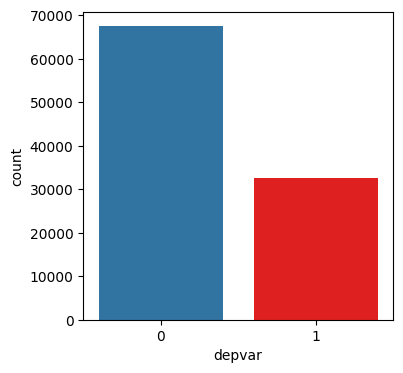

In [41]:
plt.figure(figsize=(4,4))

sns.countplot(x='depvar', data=train, palette=['#1f77b4', '#ff0000'])

상관관계 히트맵

<Axes: >

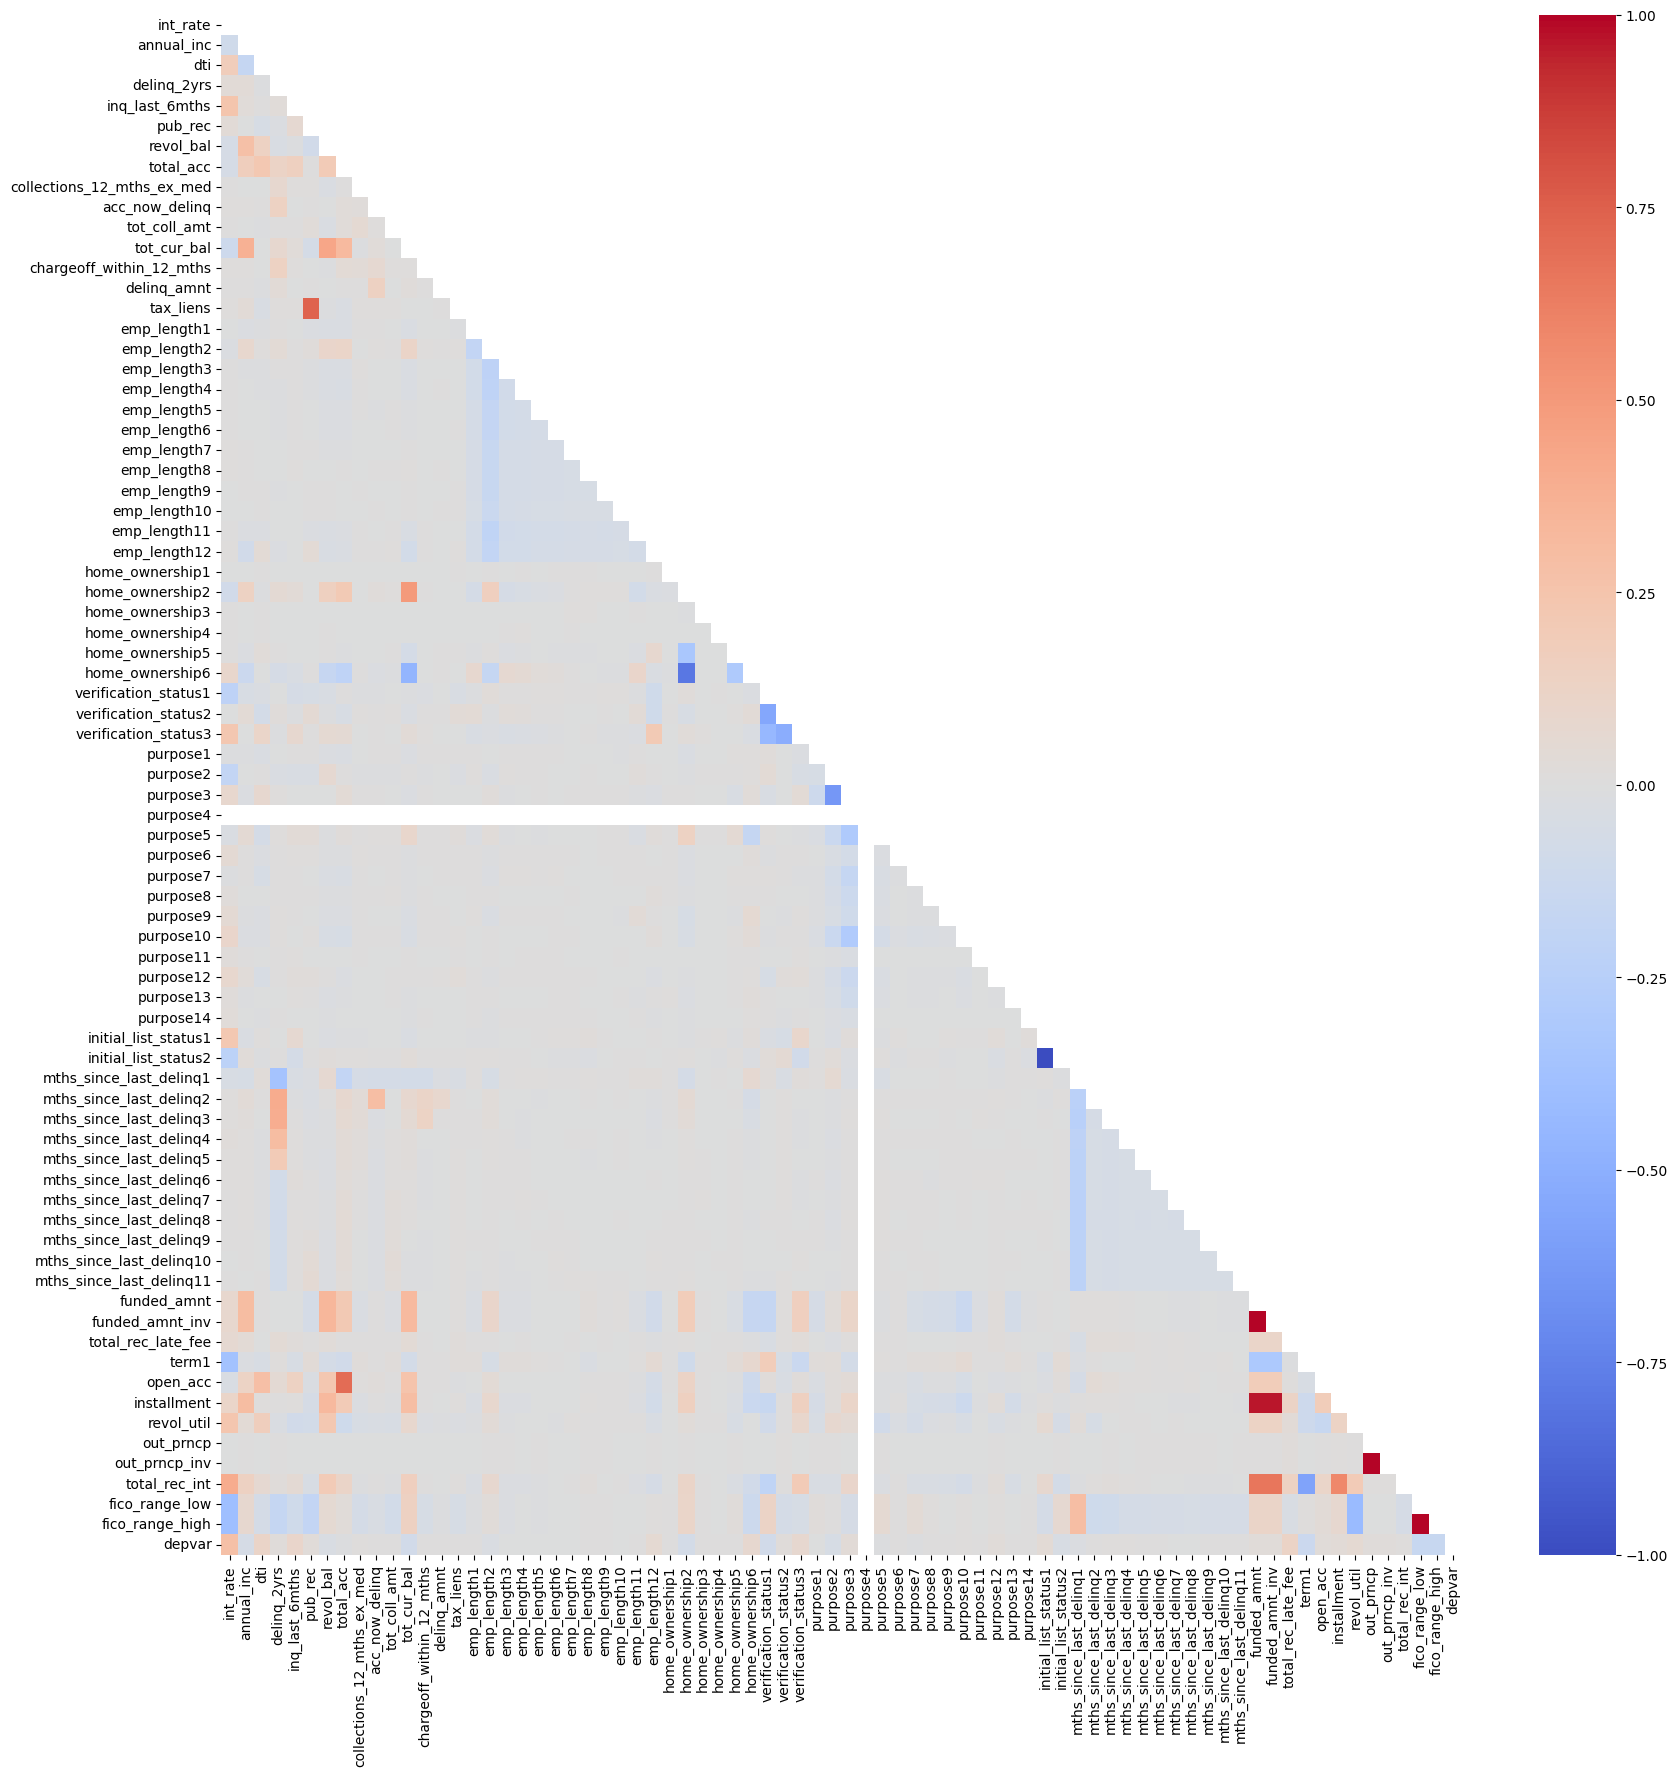

In [42]:
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

plt.figure(figsize=(20,20))

sns.heatmap(train.corr(),
             mask = mask,
            annot = False,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1)


*   0 : 상관없음
*   0.1 ~ 0.3 : 약한 상관관계
*   0.4 ~ 0.6 : 중간정도의 상관관계
*   0.7 ~ 0.9 : 아주 강한 상관관계
*   1 : 완벽 그 자체



# 2. 데이터 전처리


### 데이터 클리닝(불필요한 피처 제거)

상관계수 절대값이 0.1 이상인 피처 찾기

In [43]:
pick_1 = train.corr().abs()

# 상관계수가 0.1 이상인 컬럼 찾기
pick = set()

for col in pick_1.columns:
    for idx in pick_1.index:
        if 0.1 <= pick_1.loc[idx, col] < 1:  # 자기 자신을 제외하기 위해 <1 조건 추가
            pick.add(col)
            pick.add(idx)

# 리스트로 변환
pick = list(pick)

print(pick)

['open_acc', 'tot_cur_bal', 'purpose5', 'out_prncp_inv', 'term1', 'emp_length3', 'delinq_2yrs', 'mths_since_last_delinq11', 'emp_length9', 'emp_length8', 'initial_list_status2', 'emp_length4', 'revol_bal', 'emp_length10', 'purpose1', 'fico_range_high', 'emp_length2', 'funded_amnt', 'mths_since_last_delinq5', 'int_rate', 'emp_length7', 'revol_util', 'mths_since_last_delinq3', 'emp_length1', 'emp_length6', 'emp_length11', 'purpose9', 'purpose12', 'mths_since_last_delinq10', 'purpose8', 'delinq_amnt', 'dti', 'total_rec_int', 'pub_rec', 'initial_list_status1', 'verification_status2', 'acc_now_delinq', 'installment', 'inq_last_6mths', 'mths_since_last_delinq4', 'total_acc', 'emp_length12', 'purpose10', 'mths_since_last_delinq1', 'mths_since_last_delinq2', 'mths_since_last_delinq6', 'out_prncp', 'purpose2', 'total_rec_late_fee', 'fico_range_low', 'emp_length5', 'funded_amnt_inv', 'annual_inc', 'tax_liens', 'purpose7', 'chargeoff_within_12_mths', 'home_ownership5', 'verification_status3', 'de

In [44]:
train = train[['open_acc', 'tot_cur_bal', 'purpose5', 'out_prncp_inv', 'term1', 'emp_length3', 'delinq_2yrs', 'mths_since_last_delinq11', 'emp_length9', 'emp_length8', 'initial_list_status2', 'emp_length4', 'revol_bal', 'emp_length10', 'purpose1', 'fico_range_high', 'emp_length2', 'funded_amnt', 'mths_since_last_delinq5', 'int_rate', 'emp_length7', 'revol_util', 'mths_since_last_delinq3', 'emp_length1', 'emp_length6', 'emp_length11', 'purpose9', 'purpose12', 'mths_since_last_delinq10', 'purpose8', 'delinq_amnt', 'dti', 'total_rec_int', 'pub_rec', 'initial_list_status1', 'verification_status2', 'acc_now_delinq', 'installment', 'inq_last_6mths', 'mths_since_last_delinq4', 'total_acc', 'emp_length12', 'purpose10', 'mths_since_last_delinq1', 'mths_since_last_delinq2', 'mths_since_last_delinq6', 'out_prncp', 'purpose2', 'total_rec_late_fee', 'fico_range_low', 'emp_length5', 'funded_amnt_inv', 'annual_inc', 'tax_liens', 'purpose7', 'chargeoff_within_12_mths', 'home_ownership5', 'verification_status3', 'depvar', 'home_ownership2', 'mths_since_last_delinq9', 'purpose3', 'mths_since_last_delinq7', 'home_ownership6', 'verification_status1', 'mths_since_last_delinq8']]

<Axes: >

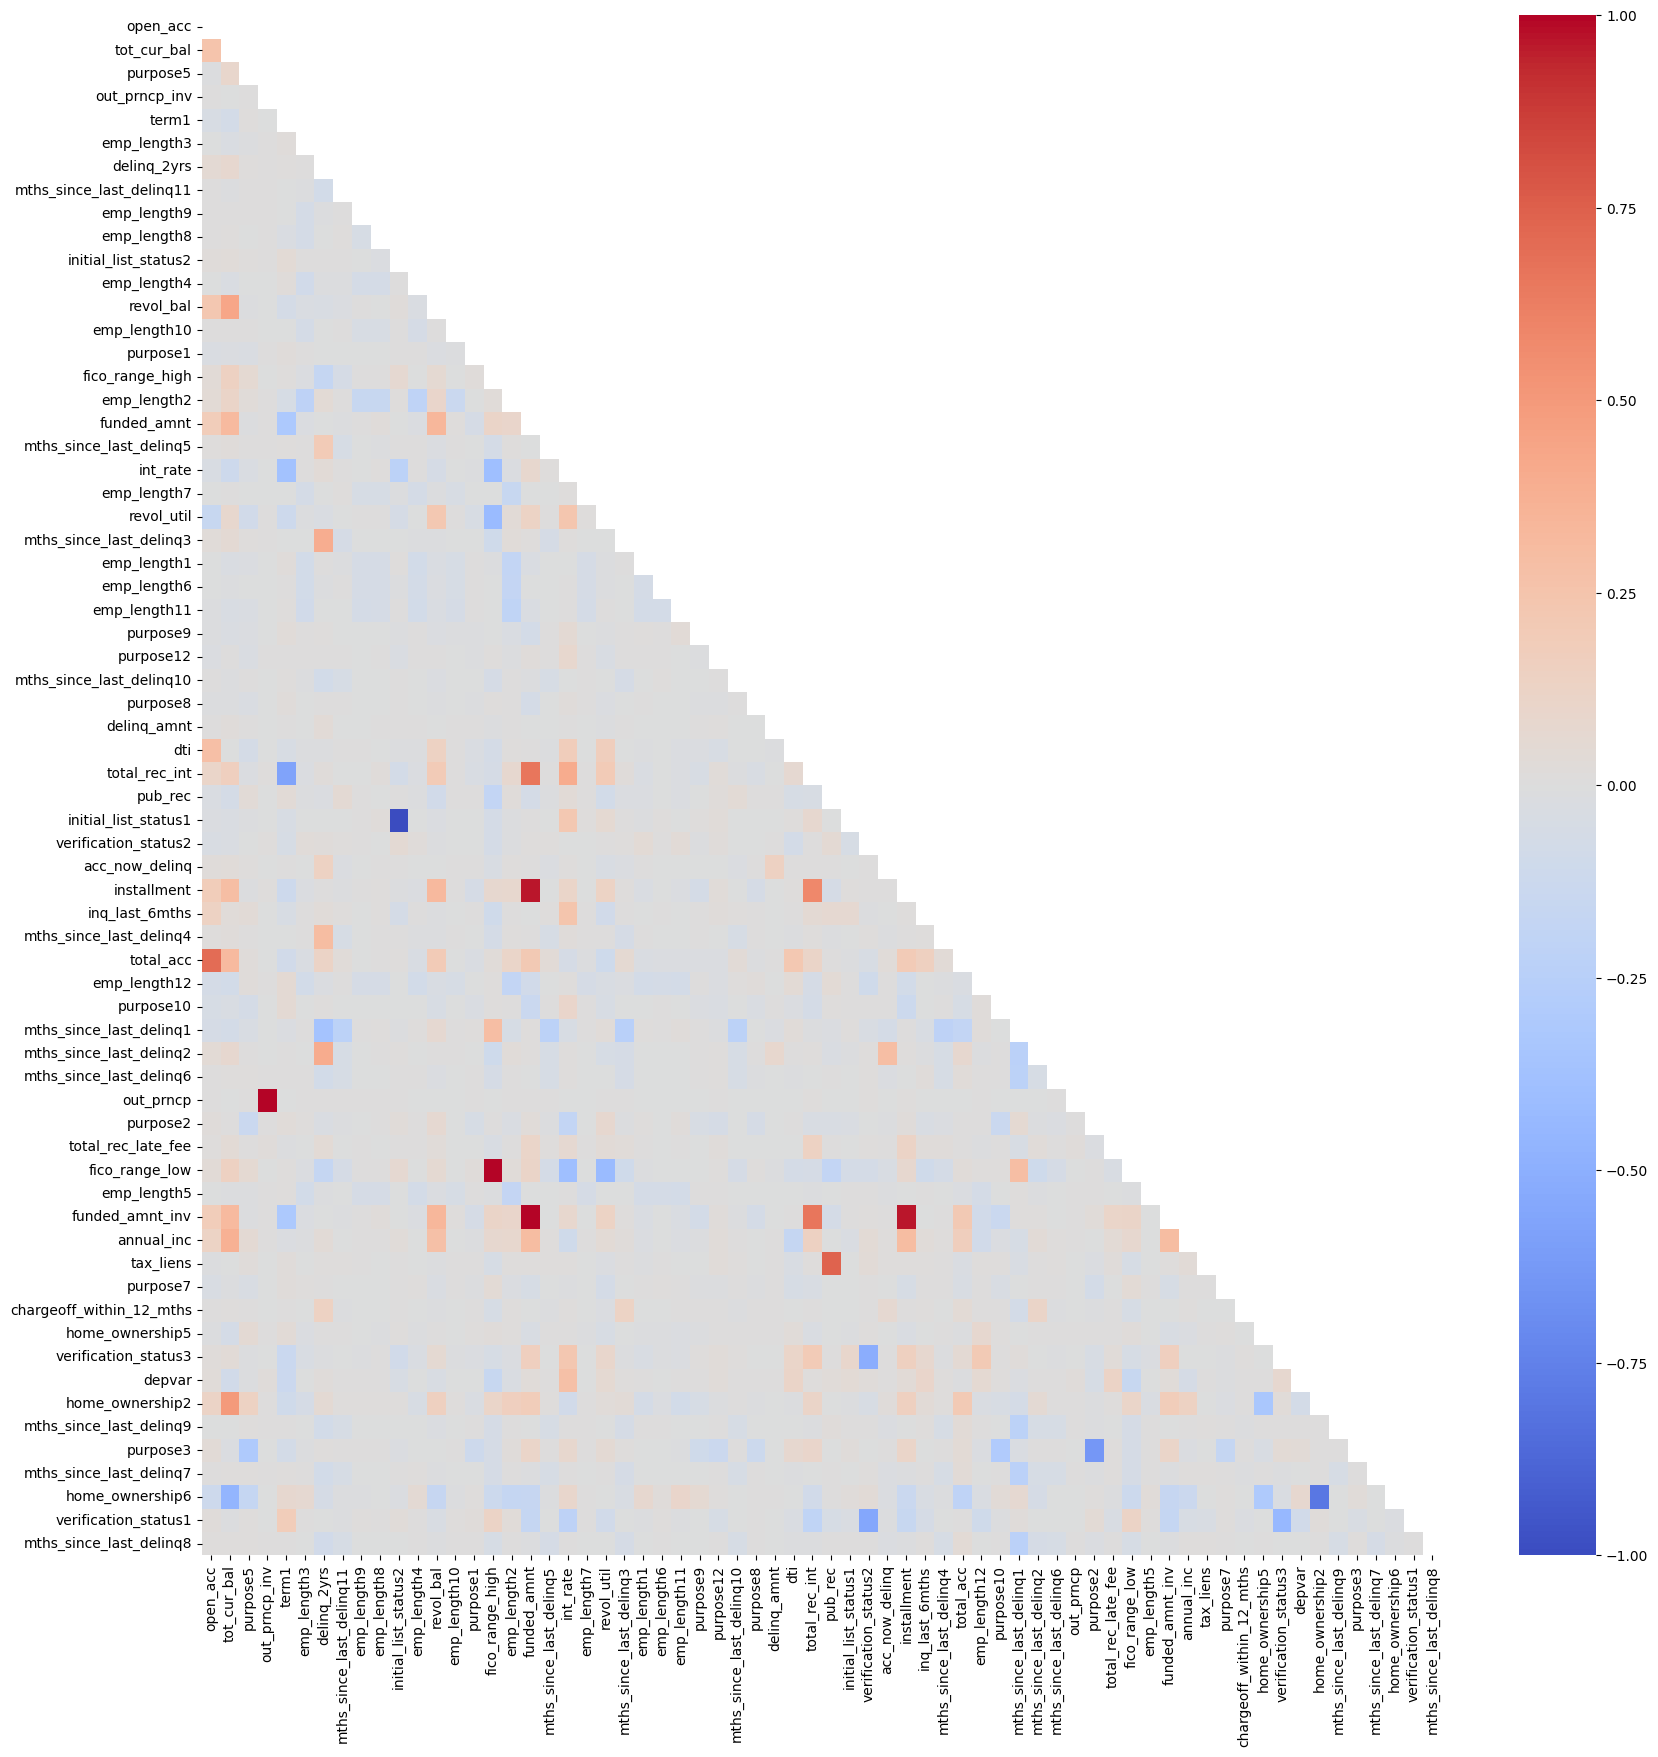

In [45]:
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

plt.figure(figsize=(20,20))

sns.heatmap(train.corr(),
             mask = mask,
            annot = False,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1)

### 데이터셋 나누기

In [46]:
from sklearn.model_selection import train_test_split    # 데이터셋 나누는 라이브러리

X = train.drop('depvar', axis = 1) # 데이터셋에서 종속변수 제거 후 저장하고 싶을 때
y = train['depvar'] # 종속변수

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  train_size=0.7,
                                                  shuffle=True)

### 데이터 표준화

In [47]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

X_train = rb_scaler.fit_transform(X_train)     # 트레이닝셋 학습하고 얻은 정보 계산
X_val = rb_scaler.transform(X_val)     # 테스트셋 학습하고 얻은 정보 계산

### 데이터 오버샘플링

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=2, random_state=0)
# 새로운 샘플 생성 시 2개의 가장 가까운 이웃을 참조하고, 결과의 재현성을 보장하기 위해 난수 생성기의 시드 값을 0으로 설정하는 것을 의미

oversample = SMOTE()

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


X_train =X_train_over
y_train =y_train_over

# 3. 데이터 모델링

In [49]:
!pip install scikit-optimize
!pip install catboost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [52]:
search_spaces = {
    'LightGBM': {'model': lgb.LGBMClassifier(verbose=-1),
                 'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                            'n_estimators': Integer(50, 300),
                            'max_depth': Integer(1, 50),
                            'num_leaves': Integer(2, 128),
                            'min_child_samples': Integer(1, 100),
                            'subsample': Real(0.5, 1.0),
                            'colsample_bytree': Real(0.5, 1.0),
                            'objective': Categorical(['binary']),
                            'is_unbalance': Categorical([True, False]),
                            'reg_alpha': Real(0.0, 1.0),
                            'reg_lambda': Real(0.0, 1.0),
                            'max_bin': Integer(200, 300),
                            'min_split_gain': Real(0.0, 0.1),
                            'subsample_freq': Integer(1, 10),
                            'feature_fraction': Real(0.5, 1.0)}},

    # 'CATboost': {'model': CatBoostClassifier(verbose=False),
    #              'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    #                         'depth': Integer(4, 10),
    #                         'l2_leaf_reg': Real(1, 10),
    #                         'iterations': Integer(100, 1000),
    #                         'border_count': Integer(32, 255)}},

    # 'XGBoost': {'model': xgb.XGBClassifier(),
    #             'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    #                        'n_estimators': Integer(50, 300),
    #                        'max_depth': Integer(1, 50),
    #                        'min_child_weight': Integer(1, 10),
    #                        'subsample': Real(0.5, 1.0),
    #                        'colsample_bytree': Real(0.5, 1.0)}},

    # '로지스틱 회귀': {'model': LogisticRegression(),
    #                  'params': {'C': Real(1e-6, 1e+6, prior='log-uniform'),
    #                             'solver': Categorical(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
    #                             'penalty': Categorical(['l2', 'none'])}},

    # '랜덤포레스트 분류': {'model': RandomForestClassifier(),
    #                       'params': {'n_estimators': Integer(100, 500),
    #                                  'max_depth': Integer(1, 50),
    #                                  'min_samples_split': Real(0.01, 0.1)}},

    # 'SVM': {'model': SVC(),
    #         'params': {'C': Real(1e-6, 1e+6, prior='log-uniform'),
    #                    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    #                    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid'])}}
}


In [54]:
from sklearn.model_selection import StratifiedKFold
best_models = {}

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, config in search_spaces.items():
    optimizer = BayesSearchCV(
        estimator=config['model'],
        search_spaces=config['params'],
        n_iter=20,
        cv=stratified_k_fold,
        n_jobs=-1,
        scoring='f1_micro'
    )
    optimizer.fit(X, y)

    best_models[model_name] = optimizer.best_estimator_

    print(f'{model_name}')
    print(f'최적 파라미터: {optimizer.best_params_}')
    print(f'점수: {optimizer.best_score_}')

LightGBM
최적 파라미터: OrderedDict([('colsample_bytree', 0.7189701621664808), ('feature_fraction', 0.8791774216318478), ('is_unbalance', False), ('learning_rate', 0.05725916779867451), ('max_bin', 200), ('max_depth', 18), ('min_child_samples', 13), ('min_split_gain', 0.1), ('n_estimators', 142), ('num_leaves', 128), ('objective', 'binary'), ('reg_alpha', 0.0), ('reg_lambda', 1.0), ('subsample', 0.7990954522502218), ('subsample_freq', 6)])
점수: 0.75668


여기 까지 이전 셀 실행(필수)

### 모델 학습

In [55]:
best_params = optimizer.best_params_
model = lgb.LGBMClassifier(**best_params, verbose=-1)

model.fit(X_train, y_train)  # 모델 학습

LGBMClassifier(colsample_bytree=0.7189701621664808,
               feature_fraction=0.8791774216318478, is_unbalance=False,
               learning_rate=0.05725916779867451, max_bin=200, max_depth=18,
               min_child_samples=13, min_split_gain=0.1, n_estimators=142,
               num_leaves=128, objective='binary', reg_lambda=1.0,
               subsample=0.7990954522502218, subsample_freq=6, verbose=-1)

### 모델 예측

In [56]:
 preds = model.predict(X_val)

# 4. 모델 평가

[[17360  2875]
 [ 4504  5261]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     20235
           1       0.65      0.54      0.59      9765

    accuracy                           0.75     30000
   macro avg       0.72      0.70      0.71     30000
weighted avg       0.75      0.75      0.75     30000



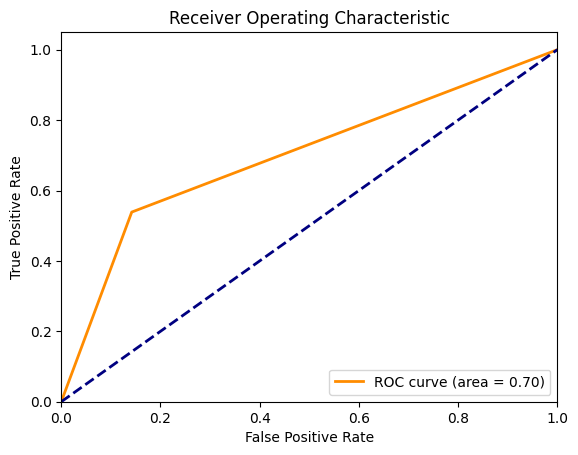

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 혼동행렬과 분류 보고서 출력
print(confusion_matrix(y_val, preds))
print(classification_report(y_val, preds))

# ROC 커브와 AUC 계산
fpr, tpr, thresholds = roc_curve(y_val, preds)  # preds_proba는 모델이 예측한 확률입니다. 이진 분류에서는 양성 클래스에 대한 확률을 사용해야 합니다.
roc_auc = roc_auc_score(y_val, preds)  # ROC AUC 점수 계산

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 5. 최종 예측

### 테스트 파일 로드 및 전처리

In [59]:
test = test[['open_acc', 'tot_cur_bal', 'purpose5', 'out_prncp_inv', 'term1', 'emp_length3', 'delinq_2yrs', 'mths_since_last_delinq11', 'emp_length9', 'emp_length8', 'initial_list_status2', 'emp_length4', 'revol_bal', 'emp_length10', 'purpose1', 'fico_range_high', 'emp_length2', 'funded_amnt', 'mths_since_last_delinq5', 'int_rate', 'emp_length7', 'revol_util', 'mths_since_last_delinq3', 'emp_length1', 'emp_length6', 'emp_length11', 'purpose9', 'purpose12', 'mths_since_last_delinq10', 'purpose8', 'delinq_amnt', 'dti', 'total_rec_int', 'pub_rec', 'initial_list_status1', 'verification_status2', 'acc_now_delinq', 'installment', 'inq_last_6mths', 'mths_since_last_delinq4', 'total_acc', 'emp_length12', 'purpose10', 'mths_since_last_delinq1', 'mths_since_last_delinq2', 'mths_since_last_delinq6', 'out_prncp', 'purpose2', 'total_rec_late_fee', 'fico_range_low', 'emp_length5', 'funded_amnt_inv', 'annual_inc', 'tax_liens', 'purpose7', 'chargeoff_within_12_mths', 'home_ownership5', 'verification_status3', 'home_ownership2', 'mths_since_last_delinq9', 'purpose3', 'mths_since_last_delinq7', 'home_ownership6', 'verification_status1', 'mths_since_last_delinq8']]

X_test = rb_scaler.transform(test)

### 모델 추론

In [60]:
preds = model.predict(X_test)

### 제출 파일 만들기

In [61]:
submission["answer"] = preds
submission.head()

,ID,answer
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [ ]:
submission.to_csv("Complite.csv", index=False)